In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df=pd.read_csv('height-weight.csv')

In [4]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [6]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


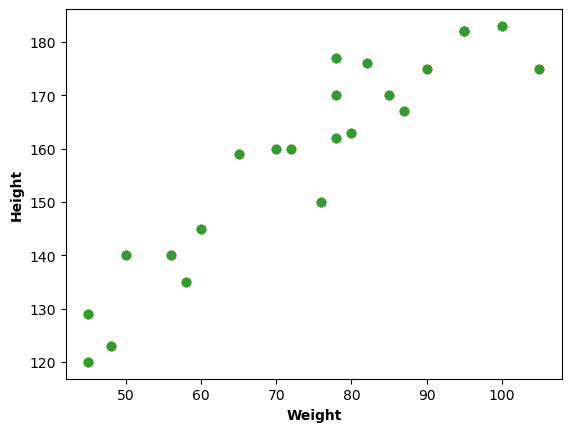

In [14]:
plt.scatter(x='Weight',y='Height' ,data=df)
plt.xlabel("Weight",fontweight='bold')
plt.ylabel("Height",fontweight='bold')
plt.show()

In [23]:
# divide the dataset into independent and dependent feature
X=df[['Weight']]    # independent feature
y=df['Height']    # dependent feature

In [24]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [25]:
X.shape

(23, 1)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [48]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [49]:
# train the simple regression model
from sklearn.linear_model import LinearRegression

In [50]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [51]:
print("the coefficient of the slope", regressor.coef_)
print("the intercept of the slope", regressor.intercept_)

the coefficient of the slope [17.03440872]
the intercept of the slope 157.5


In [53]:
y_pred=regressor.predict(X_train)

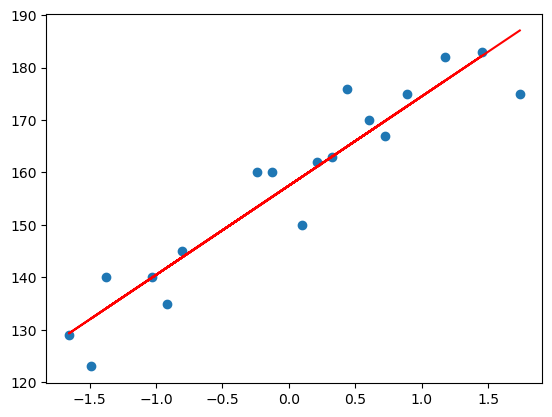

In [54]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred,'r')
plt.show()

## prediction of train data
1.predicted height output= intercept +coef_(weights)
2.y_pred_train=157.5+ 17.03(X_train)

## prediction of test data
1.predicted height output= intercept +coef_(weights)
2.y_pred_test=157.5+ 17.03(X_test)

In [60]:
y_pred=regressor.predict(X_test)

In [67]:
y_pred,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

In [68]:
# performances matrix

# MSE,MAE,RMSE
# R^2 and adjusted R^2 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [69]:
mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [70]:
score=r2_score(y_pred,y_test)
print(score)

0.5707781085341356


In [71]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.42770414471218077

In [72]:
# prediction for new data point
scaled_weight=scaler.transform([[80]])

In [73]:
scaled_weight

array([[80.]])

In [82]:
plt.scatter(y_pred,y_test)

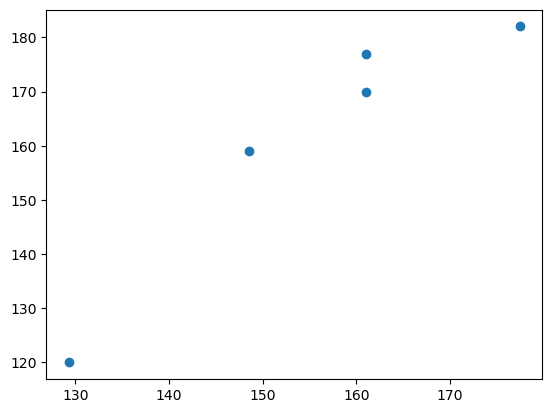

In [83]:
plt.show()

In [84]:
residuals=y_test-y_pred

In [85]:
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

In [87]:
import seaborn as sns 
sns.displot(residuals)

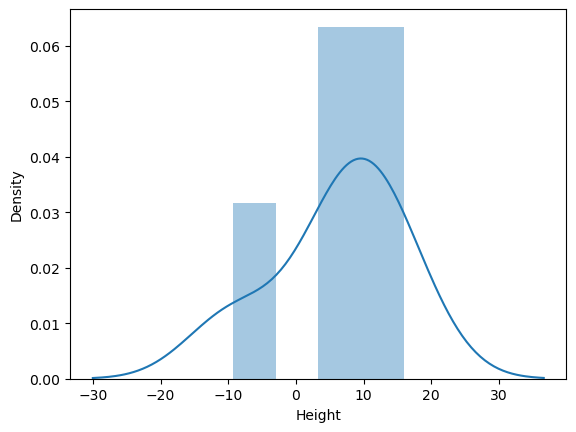

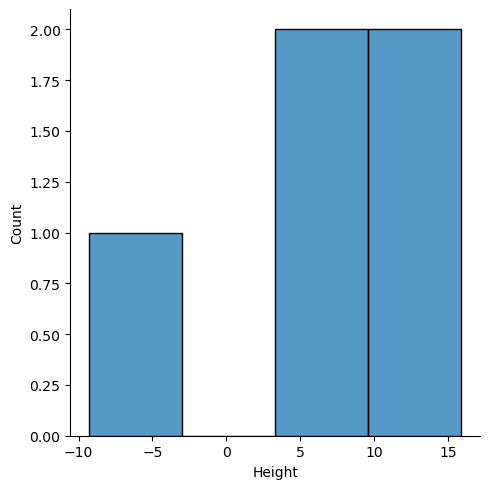

In [88]:
plt.show()

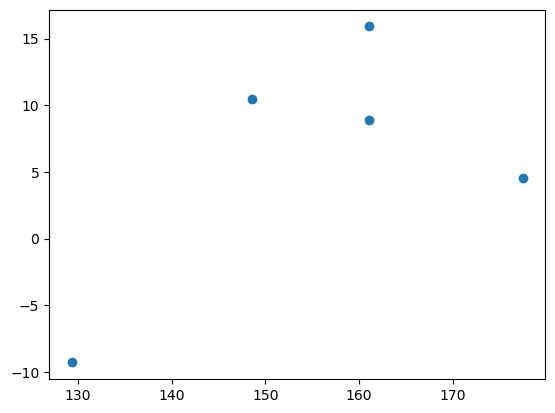

In [89]:
plt.scatter(y_pred,residuals)
plt.show()